<a href="https://colab.research.google.com/github/prashantmane091318/NLP/blob/main/NLP_LSTM_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## https://www.kaggle.com/c/nlp-getting-started/overview

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_train=pd.read_csv("/content/drive/My Drive/Colab Notebooks/RNN LSTM Fake News/train.csv")

In [ ]:
df_train.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
x_train=df_train.drop(["target"], axis=1)

In [ ]:
y_train=df_train["target"]

In [ ]:
x_train.shape, y_train.shape

((7613, 4), (7613,))

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
voc_size=1000

In [ ]:
message=x_train.copy()

In [ ]:
message["text"][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
from nltk.stem import WordNetLemmatizer
lematizer= WordNetLemmatizer()
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
corpus=[]
for i in range(0,len(message["text"])):
  review=re.sub('[^a-zA-Z]'," ",message["text"][i])
  review=review.lower()
  review=review.split()
  review=[lematizer.lemmatize(ps.stem(word)) for word in review if not word in stopwords.words('english')]
  review=" ".join(review)
  corpus.append(review)

In [ ]:
corpus

['deed reason earthquak may allah forgiv u',
 'forest fire near la rong sask canada',
 'resid ask shelter place notifi offic evacu shelter place order expect',
 'peopl receiv wildfir evacu order california',
 'got sent photo rubi alaska smoke wildfir pour school',
 'rockyfir updat california hwi close direct due lake counti fire cafir wildfir',
 'flood disast heavi rain caus flash flood street manit colorado spring area',
 'top hill see fire wood',
 'emerg evacu happen build across street',
 'afraid tornado come area',
 'three peopl die heat wave far',
 'haha south tampa get flood hah wait second live south tampa gonna gonna fvck flood',
 'rain flood florida tampabay tampa day lost count',
 'flood bago myanmar arriv bago',
 'damag school bu multi car crash break',
 'man',
 'love fruit',
 'summer love',
 'car fast',
 'goooooooaaaaaal',
 'ridicul',
 'london cool',
 'love ski',
 'wonder day',
 'looooool',
 'way eat shit',
 'nyc last week',
 'love girlfriend',
 'cooool',
 'like pasta',
 'e

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
one_hot_rep=[one_hot(word,voc_size) for word in corpus]

In [ ]:
one_hot_rep[0:3]

[[773, 904, 839, 654, 345, 459, 550],
 [982, 717, 635, 395, 912, 346, 549],
 [430, 534, 403, 411, 433, 25, 217, 403, 411, 552, 377]]

In [ ]:
sent_length=max([len(sen.split()) for sen in corpus])
sent_length

27

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
emb_doc=pad_sequences(one_hot_rep,maxlen=sent_length,padding='pre')

In [ ]:
emb_doc[0:3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 773, 904, 839, 654, 345, 459,
        550],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 982, 717, 635, 395, 912, 346,
        549],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 430, 534, 403, 411, 433,  25, 217, 403, 411, 552,
        377]], dtype=int32)

In [ ]:
emb_doc[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 773, 904, 839, 654, 345, 459,
       550], dtype=int32)

In [ ]:
embeding_vect_features=50
model=Sequential()
#from gensim import word2vec
#w2vModel = word2vec.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True, limit=50000)
#embedding_layer = Embedding(input_dim=w2vModel.syn0.shape[0], output_dim=w2vModel.syn0.shape[1], weights=[w2vModel.syn0],
                            #input_length=X.shape[1])
model.add(Embedding(input_dim=voc_size, output_dim=embeding_vect_features, input_length=sent_length))
#model.add(embedding_layer)
model.add(Dropout(0.2))
model.add(LSTM(units=500))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer='Adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 27, 50)            50000     
_________________________________________________________________
dropout (Dropout)            (None, 27, 50)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 500)               1102000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 501       
Total params: 1,152,501
Trainable params: 1,152,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import numpy  as np
x_train=np.array(emb_doc)
y_train=np.array(y_train)

In [ ]:
x_train.shape, y_train.shape

((7613, 27), (7613,))

In [ ]:
model.fit(x_train,y_train,batch_size=50,epochs=10,validation_split=0.33)

Epoch 1/10
102/102 [==============================] - 34s 16ms/step - loss: 0.6840 - accuracy: 0.5834 - val_loss: 0.5868 - val_accuracy: 0.6928
Epoch 2/10
102/102 [==============================] - 1s 9ms/step - loss: 0.5168 - accuracy: 0.7568 - val_loss: 0.6154 - val_accuracy: 0.6864
Epoch 3/10
102/102 [==============================] - 1s 9ms/step - loss: 0.4323 - accuracy: 0.8109 - val_loss: 0.6107 - val_accuracy: 0.6852
Epoch 4/10
102/102 [==============================] - 1s 9ms/step - loss: 0.4025 - accuracy: 0.8271 - val_loss: 0.7071 - val_accuracy: 0.6741
Epoch 5/10
102/102 [==============================] - 1s 9ms/step - loss: 0.3619 - accuracy: 0.8474 - val_loss: 0.7111 - val_accuracy: 0.6574
Epoch 6/10
102/102 [==============================] - 1s 9ms/step - loss: 0.3392 - accuracy: 0.8550 - val_loss: 0.7749 - val_accuracy: 0.6474
Epoch 7/10
102/102 [==============================] - 1s 9ms/step - loss: 0.3116 - accuracy: 0.8699 - val_loss: 0.7683 - val_accuracy: 0.6446
Epoc

In [ ]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

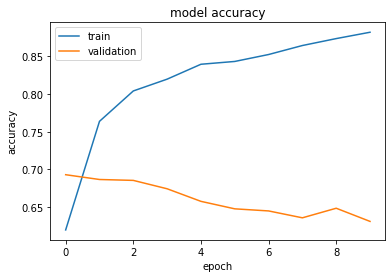

In [ ]:
from matplotlib import pyplot as plt
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
df_test=pd.read_csv("/content/drive/My Drive/Colab Notebooks/RNN LSTM Fake News/test.csv")

In [ ]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
test_message=df_test.copy()
test_message

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [ ]:
test_corpus=[]
for i in range(0,len(test_message["text"])):
  review=re.sub('[^a-zA-Z]'," ",test_message["text"][i])
  review=review.lower()
  review=review.split()
  review=[lematizer.lemmatize(ps.stem(word)) for word in review if not word in stopwords.words('english')]
  review=" ".join(review)
  test_corpus.append(review)

In [ ]:
test_corpus

['happen terribl car crash',
 'heard earthquak differ citi stay safe everyon',
 'forest fire spot pond gee flee across street cannot save',
 'apocalyps light spokan wildfir',
 'typhoon soudelor kill china taiwan',
 'shake earthquak',
 'probabl still show life arsen yesterday eh eh',
 'hey',
 'nice hat',
 'fuck',
 'like cold',
 'nooooooooo',
 'tell',
 '',
 'awesom',
 'birmingham wholesal market ablaz bbc news fire break birmingham wholesal market http co irwqcezweu',
 'sunkxssedharri wear short race ablaz',
 'previouslyondoyintv toke makinwa marriag crisi set nigerian twitter ablaz http co cmghxba xi',
 'check http co roi nsmejj http co tj zjin http co yduixefip http co lxtjc kl nsfw',
 'psa split person techi follow ablaz co burner follow ablaz',
 'bewar world ablaz sierra leon amp guap',
 'burn man ablaz turban diva http co hodwosamw via etsi',
 'dis song peopl take thing run smh eye open though set game ablaz cyhitheprync',
 'rape victim die set ablaz year old girl die burn injuri se

In [ ]:
test_one_hot_rep=[one_hot(word,voc_size) for word in test_corpus]

In [ ]:
test_emb_doc=pad_sequences(test_one_hot_rep,maxlen=sent_length,padding='pre')

In [ ]:
test_emb_doc

array([[  0,   0,   0, ..., 658, 735, 865],
       [  0,   0,   0, ..., 621, 207, 882],
       [  0,   0,   0, ..., 409, 508, 174],
       ...,
       [  0,   0,   0, ..., 404, 422, 375],
       [  0,   0,   0, ..., 422, 816, 533],
       [  0,   0,   0, ..., 298, 740, 123]], dtype=int32)

In [ ]:
x_test=np.array(test_emb_doc)

In [ ]:
y_predict=model.predict_classes(test_emb_doc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_predict

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
output=pd.DataFrame(df_test["id"],columns=["id"])
output["target"]=y_predict

In [ ]:
output

,id,target
0,0,0
1,2,0
2,3,1
3,9,0
4,11,0
...,...,...
3258,10861,1
3259,10865,1
3260,10868,0
3261,10874,1


In [ ]:
output.to_csv("/content/drive/My Drive/Colab Notebooks/RNN LSTM Fake News/sample_submission1.csv",index=False)

In [ ]:
list_of_recording=[{'recording_title':"vikas", "file":'dfjngjgn'}]

In [ ]:
list_of_recording

[{'file': 'dfjngjgn', 'recording_title': 'vikas'}]

In [ ]:
for recording_item in list_of_recording:
  print(recording_item)

{'recording_title': 'vikas', 'file': 'dfjngjgn'}


In [ ]:
for record in recording_item.items():

  recording_title=record[1]
  record_file=record[1]
print(recording_title)
print(record_file)


dfjngjgn
dfjngjgn


In [ ]:
for record in recording_item:
  record_name=recording_item[record]
  record_file=recording_item[record]


In [ ]:
record_name

'dfjngjgn'

In [ ]:
record_name

'dfjngjgn'

In [ ]:
for k,v in recording_item.items():
  recording_title=recording_item[k]
  record_file=recording_item[k]
print(recording_title)


dfjngjgn


In [ ]:
from datetime import datetime
print(datetime.strftime(datetime.strptime("2021-03-24T05:41:24Z", "%Y-%m-%dT%H:%M:%SZ"), "%d-%m-%Y %H:%M:%S"))


24-03-2021 05:41:24
